This notebook is inspired from the udemy course

# Problem statement

For a car dealership let's say that they want to develop a model to predict how much a client is willing to pay for a given car based on thee informations :

- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Min Max scaling the data
from sklearn.preprocessing import MinMaxScaler
# Train Test split
from sklearn.model_selection import train_test_split
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

2022-02-13 21:20:02.299317: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-13 21:20:02.299342: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Importing the dataset
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [3]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
car_df.tail(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


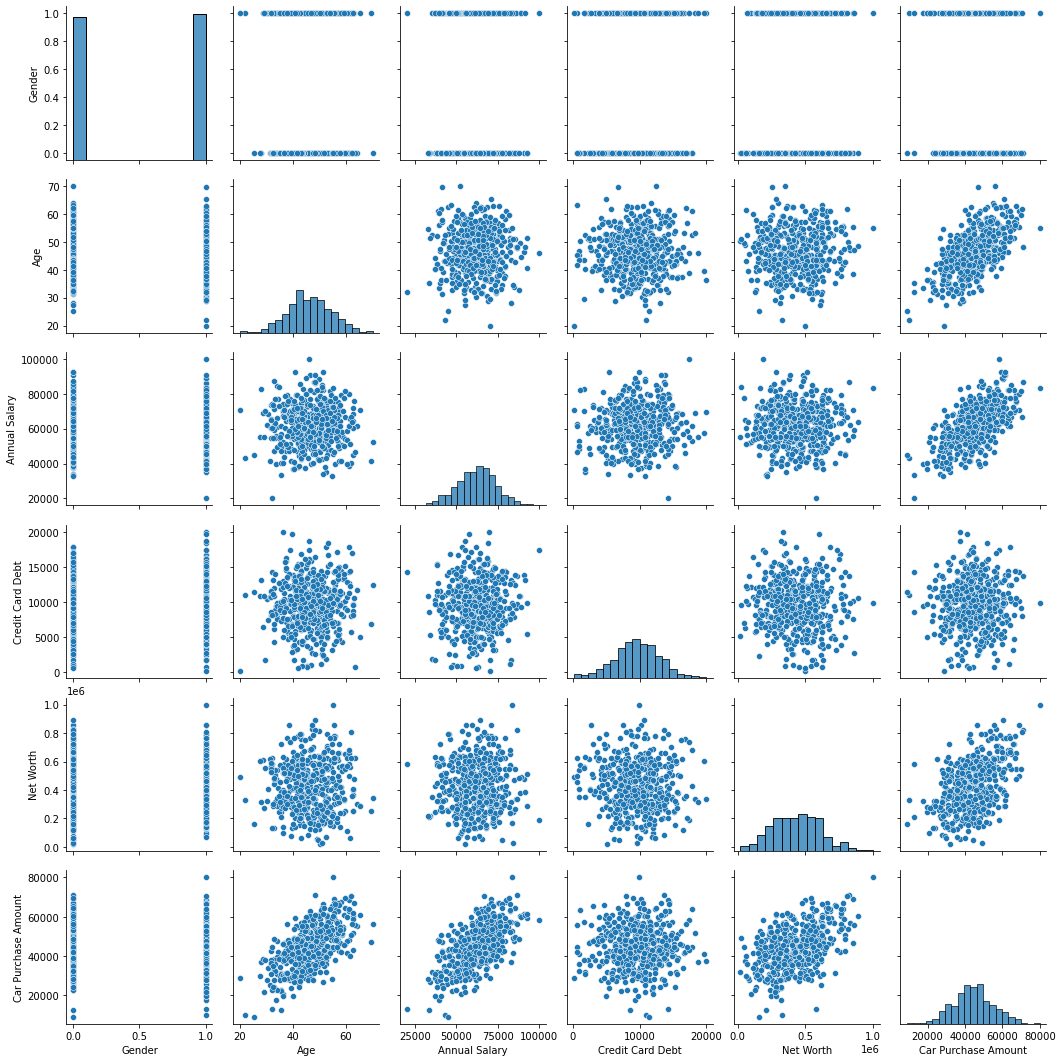

In [5]:
# Visualising data
sns.pairplot(car_df)

> First Remarks and comments

> We can see that with the more the client is getting older the more *The care purchase amount* is higher wich is logic.

>Also with the *Annual Salary* and *Net Worth* the more money you have the more probable that you will buy an expensive car. There is no clear relationship between the *Credit Crad Debt* and **the purchase amount**.

**<center>Our target feature is</center>** **<center>Car Purchase Amount</center>**

In [6]:
# Data Cleaning and Creating Test and Train data
# axis = 1 meaning drop column 
X = car_df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'], axis=1)

In [7]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [8]:
X.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340
min,0.000000,20.000000,20000.000000,100.000000,20000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000


In [9]:
y = car_df['Car Purchase Amount']

In [10]:
print("#"*70)
print(f"For the X data wich is the inputs of our model we have {X.shape[0]} client and {X.shape[1]} features")
print("#"*70)
print(f"We hace {y.shape[0]} output to predict in the y data")
print("#"*70)

######################################################################
For the X data wich is the inputs of our model we have 500 client and 5 features
######################################################################
We hace 500 output to predict in the y data
######################################################################


In [11]:
# Min Max scaling the data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [13]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [14]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [15]:
y = y.values.reshape(-1,1) 

In [16]:
y.shape

(500, 1)

In [17]:
y_scaled = scaler.fit_transform(y)

# Model training

In [18]:
# 25% is the default value for spliting for the testing data

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y_scaled, test_size=0.25)

In [19]:
print(X_train.shape)
print(X_test.shape)

(375, 5)
(125, 5)


In [20]:
# building the model architecture

model = Sequential()
model.add(Dense(25, input_dim = 5, activation = 'relu'))
model.add(Dense(25, activation= 'relu'))
model.add(Dense(1, activation = 'linear'))

2022-02-13 21:20:09.896586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-13 21:20:09.896621: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-13 21:20:09.896641: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedi): /proc/driver/nvidia/version does not exist
2022-02-13 21:20:09.896871: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 25, verbose = 1, validation_split = 0.2)

Epoch 1/10
12/12 [==============================] - 0s 14ms/step - loss: 0.5843 - val_loss: 0.4652
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 0.3317 - val_loss: 0.2658
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.1853 - val_loss: 0.1524
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0997 - val_loss: 0.0792
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0461 - val_loss: 0.0357
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.0224
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0180 - val_loss: 0.0196
Epoch 8/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0147 - val_loss: 0.0164
Epoch 9/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.0151
Epoch 10/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.0124


In [24]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

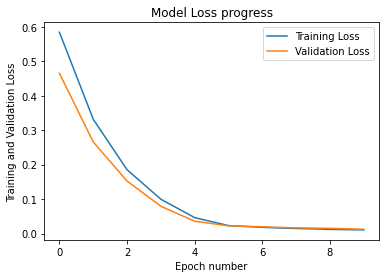

In [25]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss progress')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss','Validation Loss'])

In [28]:
print(car_df.columns.tolist())

['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']


In [31]:
# Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'
X_testing = np.array([[1,50,50000,10000,600000]])
y_predicting = model.predict(X_testing)

In [32]:
print("Expected Purchase Amount ", y_predicting)

Expected Purchase Amount  [[54713.17]]


In [35]:
y_predicted = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_predicted))

0.016932410033866772


In [38]:
import math
print(math.sqrt(mean_squared_error(y_test, y_predicted)))

0.13012459426974893
